# Librerias

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
print("Librerias Importadas")

Librerias Importadas


# Carga de Dataset

In [6]:
# Construct a tf.data.Dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/training.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [7]:
data = data.sample(frac=1)
data = data[:200000]

# DataSet

In [8]:
print("Dataset shape:", data.shape)
data.head(10)

Dataset shape: (200000, 6)


,polarity,id,date,query,user,text
394862,0,2055733352,Sat Jun 06 09:51:25 PDT 2009,NO_QUERY,majc25,Im sick with a darn fever. I feel horrible
320915,0,2003563390,Tue Jun 02 06:45:36 PDT 2009,NO_QUERY,yvonne_sharp,cant keep up with tweets they come up to quick
601012,0,2221044294,Thu Jun 18 04:34:33 PDT 2009,NO_QUERY,YK12,damm weather
778522,0,2322703253,Wed Jun 24 23:06:21 PDT 2009,NO_QUERY,guilty_,@Malechite oops sorry if i sounded like drowne...
270008,0,1989736861,Mon Jun 01 02:37:45 PDT 2009,NO_QUERY,heroinex,"@begthehobo LOL, yeah, the intuos is... the ba..."
1184345,4,1982582668,Sun May 31 11:29:57 PDT 2009,NO_QUERY,andreawarner,"@ParkerMama I don't know you yet, but I'm hopi..."
276195,0,1990978218,Mon Jun 01 06:09:22 PDT 2009,NO_QUERY,Ganu88,This is weird. There's a site called TWEEPLE.I...
927213,4,1759090159,Sun May 10 18:26:20 PDT 2009,NO_QUERY,dj_melza,"@shaundiviney i know aye, isn't it AMAZING. @s..."
1387617,4,2052947891,Sat Jun 06 02:39:47 PDT 2009,NO_QUERY,Al_ice,@DazMSmith hee hee! Nice to appreciate it!
818741,4,1553177902,Sat Apr 18 13:34:34 PDT 2009,NO_QUERY,Khristofferson,"@pinkmango77 It is cool, indeed. If you'll exc..."


In [9]:
data['polarity'].unique()

array([0, 4])

In [10]:
# Cambio el valor 4 por el numero 1 para simplicidad 
data['polarity'] = data['polarity'].replace(4,1)
data.head()
print("Valores cambiados")

Valores cambiados


In [11]:
data.describe()

,polarity,id
count,200000.00000,2.000000e+05
mean,0.49908,1.999030e+09
std,0.50000,1.932884e+08
min,0.00000,1.467811e+09
25%,0.00000,1.956913e+09
50%,0.00000,2.002102e+09
75%,1.00000,2.177031e+09
max,1.00000,2.329206e+09


# Cantidad de oraciones negativas y positivas

In [12]:
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Tamaño de muestras:         {}'.format(data.shape[0]))
print('Numero de oraciones positivas:  {}'.format(len(positives)))
print('Numero de oraciones negativas: {}'.format(len(negatives)))

Tamaño de muestras:         200000
Numero de oraciones positivas:  99816
Numero de oraciones negativas: 100184


In [13]:
# Retorna el conteo de letras en una oracion
def word_count(words):
    return len(words.split())

In [14]:
# Obtiene las palabras mas utilizadas
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 65332),
 ('and', 36987),
 ('you', 29421),
 ('for', 26793),
 ('have', 18046),
 ('that', 16156),
 ("i'm", 16016),
 ('but', 15643),
 ('just', 15512),
 ('with', 14200),
 ('was', 12862),
 ('not', 12859),
 ('this', 11206),
 ('get', 10053),
 ('good', 9679),
 ('are', 9530),
 ('all', 9336),
 ('like', 9321),
 ('out', 8607),
 ('your', 8240)]

# Procesamiento del Dataset

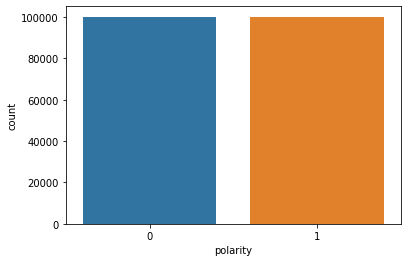

In [15]:
%matplotlib inline
sns.countplot(data['polarity'])

In [16]:
# Eliminacion de columnas innecesarias.
data.drop(['date','query','user'], axis=1, inplace=True)
print('Columnas eliminadas')

Columnas eliminadas


In [17]:
data.drop('id', axis=1, inplace=True)

In [18]:
data.head(10)

,polarity,text
394862,0,Im sick with a darn fever. I feel horrible
320915,0,cant keep up with tweets they come up to quick
601012,0,damm weather
778522,0,@Malechite oops sorry if i sounded like drowne...
270008,0,"@begthehobo LOL, yeah, the intuos is... the ba..."
1184345,1,"@ParkerMama I don't know you yet, but I'm hopi..."
276195,0,This is weird. There's a site called TWEEPLE.I...
927213,1,"@shaundiviney i know aye, isn't it AMAZING. @s..."
1387617,1,@DazMSmith hee hee! Nice to appreciate it!
818741,1,"@pinkmango77 It is cool, indeed. If you'll exc..."


In [19]:
# Verificar si existen valores nulos
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [20]:
#Cambio de tipo pandas a string
data['text'] = data['text'].astype('str')

In [21]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"shouldn't", 'this', 'i', 'both', 'has', 'yourself', 'my', 'again', 'll', 'below', 'the', 'm', "won't", 'had', 'mightn', 'or', 'further', 'there', 'yours', 'they', 'aren', 'd', 'am', 'that', 'all', 'does', 'wasn', 'into', 'other', 'who', 'its', 's', "isn't", 'himself', 'what', 'o', "wasn't", 'it', "shan't", 'needn', "she's", 'and', 'isn', 'at', 'no', 'can', 'because', 'hadn', 're', "you'd", 'which', "needn't", 'an', 'your', 'too', 'been', 'by', 'y', 'nor', "it's", 'own', 'to', 'in', 'she', 'of', 'yourselves', 'before', 'ourselves', 'whom', 'wouldn', 'his', 'ours', 'me', 'them', "hasn't", 'about', "aren't", 'do', 'any', 'doing', 'couldn', 'such', 'than', 'ain', "doesn't", 'against', 'mustn', 'here', 'shouldn', "weren't", 'few', 'through', 'her', 'but', 'until', "didn't", 'these', 'you', 'those', 'for', 'a', 'under', 'most', 'very', 'after', 've', "you've", "that'll", 'from', "

In [22]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

>  Los pasos de preprocesamiento  son:

* Minúsculas: cada texto se convierte a minúsculas.
* Eliminación de URL: los enlaces que comienzan con "http" o "https" o "www" se reemplazan por "".
* Eliminación de nombres de usuario: reemplace @Nombres de usuario con la palabra "". (por ejemplo: "@XYZ" a "")
* Eliminación de palabras cortas: Se eliminan las palabras con una longitud menor a 2.
* Eliminación de palabras vacías: Las palabras vacías son las palabras en inglés que no agregan mucho significado a una oración. Pueden ignorarse con seguridad sin sacrificar el significado de la oración. (por ejemplo: "el", "él", "tener")
* Lematización: La lematización es el proceso de convertir una palabra a su forma básica. (por ejemplo: "lobos" a "lobo")

In [23]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Pasar a minusculas
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Eliminacion de URL
    tweet = re.sub(urlPattern,'',tweet)
    # Eliminacion de los nombres de usuario
    tweet = re.sub(userPattern,'', tweet) 
    #Eliminacion de puntuaciones 
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    # Tokenizando las palabras
    tokens = word_tokenize(tweet)
    # Eliminacion de Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    # Lematizacion
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)
print("Funcion lista")

Funcion lista


In [24]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Procesamiento de datos realizado.')

Procesamiento de datos realizado.


In [25]:
data.head(10)


,polarity,text,processed_tweets
394862,0,Im sick with a darn fever. I feel horrible,sick darn fever feel horrible
320915,0,cant keep up with tweets they come up to quick,ant keep tweet come quick
601012,0,damm weather,amm weather
778522,0,@Malechite oops sorry if i sounded like drowne...,malechite oops sorry sounded like drowned kitteh
270008,0,"@begthehobo LOL, yeah, the intuos is... the ba...",begthehobo lol yeah intuos bamboo around 200 l...
1184345,1,"@ParkerMama I don't know you yet, but I'm hopi...",parkermama dont know yet im hoping sorry bad n...
276195,0,This is weird. There's a site called TWEEPLE.I...,weird there site called tweeplein profile name...
927213,1,"@shaundiviney i know aye, isn't it AMAZING. @s...",shaundiviney know aye isnt amazing see sonny w...
1387617,1,@DazMSmith hee hee! Nice to appreciate it!,dazmsmith hee hee nice appreciate
818741,1,"@pinkmango77 It is cool, indeed. If you'll exc...",pinkmango77 cool indeed youll excuse must show...


## Vectorization and Splitting 

In [28]:
X = data['processed_tweets'].values
y = data['polarity'].values
print("listo")

listo


In [29]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors.

TF-IDF

This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.

Inverse Document Frequency: This downscales words that appear a lot across documents.


In [30]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print('Numero de palabras destacadas: ', len(vector.get_feature_names()))

Numero de palabras destacadas:  169626


In [31]:
print(X.shape)
print(y.shape)

(200000, 169626)
(200000,)


## Split train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)
print("Split realizado")

Split realizado


In [33]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 169626)
y_train (160000,)

X_test (40000, 169626)
y_test (40000,)


# Model Building <a id="7"></a>

### Model evaluating function

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re
print("Librerias listas")

Librerias listas


In [35]:
import keras
keras.__version__

'2.8.0'

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 1065   35  667]
 [   0    0    0 ...   89   47  931]
 [   0    0    0 ...    0    0  177]
 ...
 [   0    0    0 ...    2  451  127]
 [   0    0    0 ...   68   30 1377]
 [   0    0    0 ...    0    0  669]]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=202)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
4998/5000 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.7493
Epoch 1: val_accuracy improved from -inf to 0.76775, saving model to rnn_model.hdf5
5000/5000 [==============================] - 74s 14ms/step - loss: 0.5071 - accuracy: 0.7494 - val_loss: 0.4792 - val_accuracy: 0.7678
Epoch 2/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.7757
Epoch 2: val_accuracy improved from 0.76775 to 0.77450, saving model to rnn_model.hdf5
5000/5000 [==============================] - 60s 12ms/step - loss: 0.4679 - accuracy: 0.7757 - val_loss: 0.4729 - val_accuracy: 0.7745
Epoch 3/10
2654/5000 [==============>...............] - ETA: 24s - loss: 0.4505 - accuracy: 0.7846

In [ ]:
sequence = tokenizer.texts_to_sequences(['good'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Comentario positivo con unporcentaje de : %', pred[0][0])
else:
  print('Comentario negativo con unporcentaje de : %', pred[0][0])
# print(pred)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/dataset/rnn_model(1).hdf5')
sequence = tokenizer.texts_to_sequences(['his is the worst service i have ever tried'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Comentario positivo con un porcentaje de : %', pred[0][0])
  print(0)
else:
  print('Comentario negativo con un porcentaje de : %', pred[0][0])
  print(1)
# print(pred)

In [ ]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')